In [2]:
import glob
import pandas as pd
import pickle
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#load images
cov = glob.glob('D:/projects data/dataset/pnu/Covid19-dataset/train/Covid/*')
pne = glob.glob('D:/projects data/dataset/pnu/Covid19-dataset/train/Viral Pneumonia/*')
norm = glob.glob('D:/projects data/dataset/pnu/Covid19-dataset/train/Normal/*')

str

In [17]:
def preprocess(img):
    img= cv2.resize(img,(240,240))
    img=np.array(img)/255
    return img

In [11]:
len(cov),len(pne),len(norm)

(132, 70, 70)

In [18]:
#make array for processed imgs ,and one for labels
x=[]
y=[]
for i in cov:
    im=cv2.imread(i)
    x.append(preprocess(im))
    y.append(0)
    
for i in pne:
    im=cv2.imread(i)
    x.append(preprocess(im))
    y.append(1)
    
for i in norm:
    im=cv2.imread(i)
    x.append(preprocess(im))
    y.append(2)

In [22]:
x=np.array(x)
x.shape

(272, 240, 240, 3)

In [27]:
y=np.array(y)
y.shape

(272,)

In [28]:
#save the imgs and labels
import  pickle 
pickle.dump(x, open("pneu_data_0.pkl", 'wb'))
pickle.dump(y, open("pneu_labeles_0.pkl", 'wb'))

In [3]:
import  pickle 

x=pickle.load(open("pneu_data_0.pkl", 'rb'))
y=pickle.load(open("pneu_labeles_0.pkl", 'rb'))
x.shape,y.shape

((272, 240, 240, 3), (272, 3))

(<matplotlib.image.AxesImage at 0x24dae528e20>, array([1, 0, 0]))

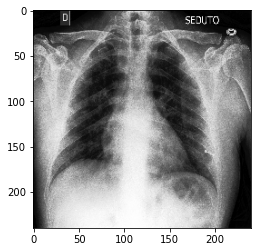

In [5]:
plt.imshow(x[0],),y[0]#covid

(<matplotlib.image.AxesImage at 0x24dae39d8e0>, array([0, 1, 0]))

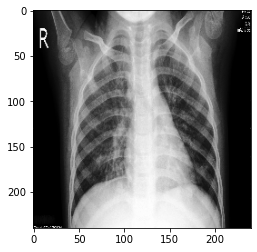

In [11]:
plt.imshow(x[150]),y[150]#Pneumonia 

(<matplotlib.image.AxesImage at 0x24db0bb4cd0>, array([0, 0, 1]))

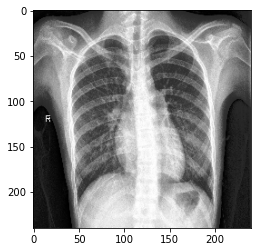

In [14]:
plt.imshow(x[204]),y[204]#normal chest

In [5]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.1)

In [6]:
import tensorflow as tf
import tensorflow_hub as hub

model = tf.keras.Sequential([
    #use efficientnet_v2 pre-trained model from tensorflow_hub
    hub.KerasLayer("https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(3, activation='softmax')
])

In [7]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.categorical_crossentropy, metrics = ['accuracy'])
history=model.fit(X_train, y_train, epochs=10)

Epoch 1/10
8/8 [==============================] - 13s 220ms/step - loss: 1.0007 - accuracy: 0.5205
Epoch 2/10
8/8 [==============================] - 1s 102ms/step - loss: 0.6601 - accuracy: 0.8033
Epoch 3/10
8/8 [==============================] - 1s 102ms/step - loss: 0.4832 - accuracy: 0.8852
Epoch 4/10
8/8 [==============================] - 1s 102ms/step - loss: 0.3926 - accuracy: 0.8730
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.3364 - accuracy: 0.8852
Epoch 6/10
8/8 [==============================] - 1s 102ms/step - loss: 0.2989 - accuracy: 0.9057
Epoch 7/10
8/8 [==============================] - 1s 107ms/step - loss: 0.2742 - accuracy: 0.9016
Epoch 8/10
8/8 [==============================] - 1s 103ms/step - loss: 0.2511 - accuracy: 0.9303
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.2363 - accuracy: 0.9344
Epoch 10/10
8/8 [==============================] - 1s 102ms/step - loss: 0.2202 - accuracy: 0.9344


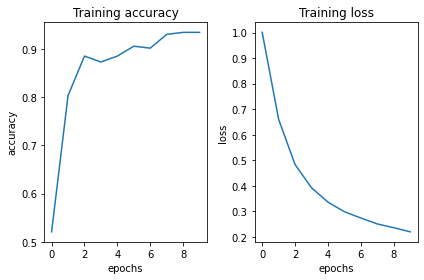

In [28]:
plt.subplot(1,2,1) # row 1, col 2 index 1

plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
# plt.legend()

# plt.show()
plt.subplot(1, 2,2) # row 1, col 2 index 1
plt.plot(history.history['loss'])
plt.title('Training loss')
plt.xlabel("epochs")
plt.ylabel("loss")
# plt.legend()
plt.tight_layout()
plt.show()

In [11]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 2s 2s/step - loss: 0.1261 - accuracy: 1.0000


[0.12606827914714813, 1.0]

In [30]:
len(X_test)

28

In [29]:
model.save('pneu_model')

INFO:tensorflow:Assets written to: pneu_model\assets


INFO:tensorflow:Assets written to: pneu_model\assets


try adding filters for the original data

In [ ]:
import numpy as np
import pandas as pd
import pickle

import cv2
from skimage.feature import hog
from skimage.filters.rank import entropy
from skimage.morphology import disk

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [ ]:
img=cv2.imread(data.path[9])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = entropy(img, disk(1)) 

plt.imshow(img)


hog_images = []
for img in x:
    fd, hog_image = hog(img, orientations=8,
                        cells_per_block=(1, 1), visualize=True)
    hog_images.append(hog_image)
plt.imshow(hog_images[4])